<a href="https://colab.research.google.com/github/WizardOfCodes442/student-facial-biometric-project/blob/main/Face_Reg0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
10484/10484 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


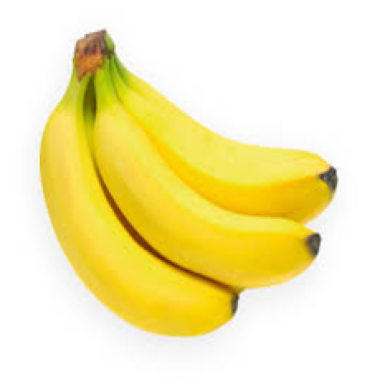

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predictions:


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [2]:
import tensorflow as tf
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import  matplotlib.pyplot as plt

#load pre-trained MobileNetV2 model
model = tf.keras.applications.MobileNetV2(weights='imagenet')
# Labels for ImageNet classes
LABELS_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', LABELS_URL)
labels = np.array(open(labels_path).read().splitlines())[1:]

# Function to load an image from a URL
def load_image_from_url(image_url, target_size):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((target_size, target_size))
    return img

# Function to preprocess the image for MobileNetV2
def preprocess_image(image, target_size):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Function to display the image
def display_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Function to predict the class of the image
def predict_image(image_url):
    img = load_image_from_url(image_url, 224)
    display_image(img)
    img_preprocessed = preprocess_image(img, 224)

    # Run the image through the MobileNetV2 model
    predictions = model.predict(img_preprocessed)

    # Decode predictions
    top_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=3)[0]

    print("Predictions:")
    for i, pred in enumerate(top_predictions):
        print(f"{i + 1}: {labels[pred[0]]} with confidence {pred[2] * 100:.2f}%")

# URL of test image
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcScbmG-eAWeqlI59P3goOpyFrISCLtEIyQisg&s'

# Run the prediction on the image
predict_image(image_url)
